## Kvanttilaskennan  lukilokurssi, kierros 4

Tehtävissä 1 ja 2 käsitellään yhden kubitin systeemiä. Tehtävissä 3 ja 4 tarkastellaan useamman kubitin systeemiä.

## Esimerkki 1: yleinen U-portti ja kubitin superpositiotilan muodostaminen

Qiskitissä kubitin tilaa voidaan muuttaa yleisellä U-portilla, joka soveltuu hyvin erilaisten kubitin superpositiotilojen luomiseen. U-portin avulla voidaan toteuttaa myös muiden kvanttiportien (esim. $X$, $Y$ ja $Z$) mukaiset kierrot, joilla muutetaan kubitin tilaa.  

Unitaarisen U-portin matriisiesitys (Huomaa, että U on kolmen muuttujan $\theta, \phi, \lambda$ funktio):
![u_matriisi](images/u-gate.png)

Missä $i$ on kompleksitason imaginaariyksikkö, eksponenttifunktion kantaluku $e=2.71..$ on Neperin luku, ja kulmat $\theta$ ja $\phi$ ovat kiertoja Blochin pallolla z-akselin ja x-akselin suhteen:

![bloch_sphere](images/bloch.png)

Kubitin tilavekotorin $|\psi >$ esittämisessä käytettävien kulmien arvojoukot:
$0\le\theta\le\pi$ ja $0\le\phi\le2\pi$ ja kubitin ns. yleinen vaihe  $0\le\lambda\le2\pi$, missä kulmat on esitetty radiaaneissa. 

Muista muuntosuhde radiaanien ja asteiden välillä: $\pi = 180^o$ eli esimerkiksi kulma $\frac{\pi}{2} = 90^o$ ja $\frac{\pi}{4} = 45^o$. Jatkossa tarvittavia trigonometristen funktioiden arvoja: $sin(\frac{\pi}{2})=1, cos(\frac{\pi}{2})=0 $, $cos(\pi)= -1$ ja $sin(\pi)=0$.

### Esimerkki 1
Valitaan kubitin alkutilaksi $\psi = |0>$ ja kulmien $\theta$ ja $\phi$ sekä vaiheen $\lambda$ arvoiksi $\frac{\pi}{2}$.  Muodostetaan U-matriisiesitys:'


Olkoon
$$
U(\frac{\pi}{2},\frac{\pi}{2},\frac{\pi}{2})=  \pmatrix {cos(\frac{\pi}{4}) & -e^{i\frac{\pi}{2}}sin(\frac{\pi}{4}) \\ e^{i\frac{\pi}{2}}sin(\frac{\pi}{4}) & e^{i\frac{\pi}{2}+i\frac{\pi}{2}}cos(\frac{\pi}{4})} 
$$



Koska $sin(\frac{\pi}{2})= 1$ ja $cos(\frac{\pi}{2})= 0$ ja $sin(\frac{\pi}{4})=cos(\frac{\pi}{4})=\frac{1}{\sqrt{2}}$, sekä Eulerin kaavan mukaan $e^{i\pi}=cos(\pi)+isin(\pi)=-1+0i=-1$ ja $e^{i\frac{\pi}{2}}=cos(\frac{\pi}{2})+isin(\frac{\pi}{2})=0+i =i$, niin U-matriisi sievenee muotoon:

$$
U(\frac{\pi}{2},\frac{\pi}{2},\frac{\pi}{2})=  \pmatrix {\frac{1}{\sqrt{2}} & -i\frac{1}{\sqrt{2}} \\ i\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}}=\frac{1}{\sqrt{2}}\pmatrix{1&-i \\ i &-1} 
$$


Operoidaan alkutilassa $|0>$ olevaan kubittiin U-matriisilla, jolloin saadaan uusi tilavektori $|\psi '>$:

$$
|\psi '> = U|0> = \frac{1}{\sqrt{2}}\pmatrix{1&-i \\ i &-1}  \pmatrix {1 \\0} = \frac{1}{\sqrt{2}}\pmatrix {1 \\i}
$$

Esitetään U-Matriisilla toteutettu kierto eli superpositiotilan muodostaminen kantavektorien $|0>=\pmatrix{1\\0}$ ja$|1>=\pmatrix{0\\1}$ avulla:

$$
|\psi '> = U|0> = \frac{1}{\sqrt{2}}\pmatrix {1 \\i} = \frac{1}{\sqrt{2}}\pmatrix{1\\0}+i\frac{1}{\sqrt{2}}\pmatrix{0\\1} =
\frac{1}{\sqrt{2}}|0>+i\frac{1}{\sqrt{2}}|1>
$$

Tulos tarkoittaa, että kun alkutilaan $|0>$ operoitiin U-matriisilla, niin kubitti siirtyi tilojen $|0>$ ja $|1>$ superpositiotilaan $|\psi '>$. 

Alla on esitetty miten esimerkin 1 kubitin superpositiotilan muodostaminen tehdään qiskitin metodilla `.u(angle1, angle2, angle3)`.

In [1]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [2]:
from qiskit import *
#from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [3]:
q = QuantumRegister(1)
cr =ClassicalRegister(1)
qc = QuantumCircuit(q,cr)
#qc.h(0) #tehtavaa 3 varten
# Operoidaan tilaan |0> U-matriisilla
qc.u(pi/2,pi/2,pi/2,q)
#qc.u(pi,0,pi,q) # X-portti tehtavaa 1 varten
#qc.u(pi/2,0,pi,q) H-portti
#qc.u(pi/4,0,0,q) # tehtava
qc.draw()

┌────────────────┐
q0_0: ┤ U(π/2,π/2,π/2) ├
      └────────────────┘
c0: 1/══════════════════

In [4]:
#simuloidaan U-matriisi
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=2)

array([[ 7.07106781e-01+0.00000000e+00j, -4.32978028e-17-7.07106781e-01j],
       [ 4.32978028e-17+7.07106781e-01j, -7.07106781e-01+8.65956056e-17j]])

Huomaa numpyn imaginääriyksikkö on j. Lisäksi tulosteen merkintä $e^{-01}$ tarkoittaa numpyssä kerrointa $10^{-1}$. Lisäksi numeeriset arvot $e^{-17}$ pyöristyvät luvuksi 0.  Tunnista numerrinen likiarvo $7.07e^-1=\frac{1}{\sqrt{2}}$

Tulostettu array vastaa esimerkissä 1 muodostettua U-matriisia.

Alkutilassa kubitin tilavektori oli $|0>$. Tulosteaan tilavektori kun tilavektoria on kierretty $\frac{\pi}{2}$ eli $90^o$ z-akselin ja x-akselin suhteen.

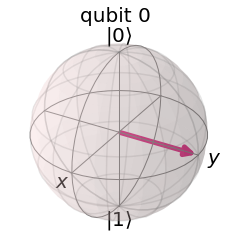

In [5]:
# Piirrätään tilavektori U-matriisin operaation jälkeen
from qiskit.visualization import plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Tehtävä 1
a) Osoita esimerkin 1 U-matriisin sieventämisen TAI helpommin muokkaamalla esimerkin 1 python koodia:  bit-flip-gate eli X-portti voidaan toteuttaa U-matriisilla seuraavasti:

$$
X =\pmatrix{0&1\\1&0}= U(\pi,0,\pi)
$$

Ohje, sijoita U-matriisiin seuraavat kulmien arvot: $\theta =\pi,\phi=0$ ja globaalivaihe $\lambda=\pi$.

b) Osoita esimerkin 1 U-matriisin tai python-koodia muokkaamalla, että Hadamard-portti eli H-gate voidaan muodostaa U-matriisilla seuraavasti:

$$
H =\frac{1}{\sqrt{2}}\pmatrix{1&1\\1&-1} = U(\frac{\pi}{2},0,\pi)
$$

In [12]:
from qiskit import *
#from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [13]:
q = QuantumRegister(1)
cr =ClassicalRegister(1)
qc = QuantumCircuit(q,cr)
#qc.h(0) #tehtavaa 3 varten
# Operoidaan tilaan |0> U-matriisilla
qc.u(pi/2,0,pi,q)
#qc.u(pi,0,pi,q) # X-portti tehtavaa 1 varten
#qc.u(pi/2,0,pi,q) H-portti
#qc.u(pi/4,0,0,q) # tehtava
qc.draw()

┌────────────┐
q8_0: ┤ U(π/2,0,π) ├
      └────────────┘
c3: 1/══════════════

In [14]:
#simuloidaan U-matriisi
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=2)

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]])

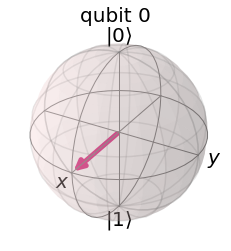

In [15]:
# Piirrätään tilavektori U-matriisin operaation jälkeen
from qiskit.visualization import plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

## Esimerkki 2: kubitin superpositiotilan mittaaminen ja tietyn tilan todennäköisyyden laskeminen

Jatketaan esimerkin 1 tilavektorin 

$$
|\psi '> = U|0>  =
\frac{1}{\sqrt{2}}|0>+i\frac{1}{\sqrt{2}}|1> =\frac{1}{\sqrt{2}}\pmatrix {1 \\i}
$$

tarkastelua. Tavoitteena on laskea millä todennäköisyydellä mittauksessa superpositiotila $|\psi '>$ tipahtaa mittauksessa tilaan $|0>$.  Katso tarvittaessa bra-ket-esityksen
<a href ="https://youtu.be/aVFe08G0uYk" target="_blank">ohjevideo</a>.

Muodostetaan ket-vektrista $|0>$ bra-vektori $<0|$, ja muodostetaan vastaava kompleksikonjukaatin transpoosi tilavektorille $|\psi '>$: 


$$
|0> = \pmatrix {1 \\0}
$$

$$
<0| =\pmatrix {1 &0}
$$

ja

$$
< \psi ' | = \frac{1}{\sqrt{2}}\pmatrix {1 &-i}
$$

Tilan $|0>$ todennäköisyys ([]-sulut laskujärjestyksen hahmottamiseksi):
$$
P(0)= < \psi ' |0><0|\psi'>  = [\frac{1}{\sqrt{2}}\pmatrix {1 &-i}\pmatrix {1 \\0}][ \pmatrix {1 &0}  \frac{1}{\sqrt{2}}\pmatrix {1 \\i}]= [\frac{1}{\sqrt{2}}][\frac{1}{\sqrt{2}}] =\frac{1}{2}
$$


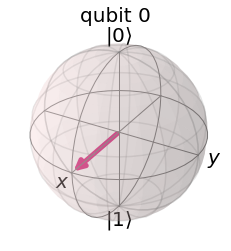

In [16]:
# Piirretään qubitin kvanttitila blochin pallolle
from qiskit.visualization import plot_bloch_multivector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

Tulos tarkoittaa, että superpositiotilaa esittävällä tilavektorilla $\psi '$ on 50% todennäköisyys valita mittauksessa tila $|0>$0 tai $|1>$.

## Tehtävä 2
Olkoon kubitti alkutilassa $|0> = \pmatrix{1\\0}$. Muodosta superpositiotila $|+>$ operoimalla Hadamard-portilla:

$$
|+> = H |0>
$$

ja laske esimerkin 2 avulla bra-ket-esitystä käyttäen tilan $|1>$ todennäköisyys:

$$
P(1)= <+|1><1||+>
$$

Ratkaisut:

$$
|+> = H |0>  = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ 1}  \\
$$

Muodostetaan bra-vektori
$$
<+| =  \frac{1}{\sqrt 2} \pmatrix {1  & 1}  \\
$$

Lasketaan 1-tilan todennäköisyyys


$$
P(1)= <+|1><1||+> = [ \frac{1}{\sqrt 2} \pmatrix {1  & 1} \pmatrix {0  \\ 1}  ][\pmatrix {0  & 1}\frac{1}{\sqrt 2} \pmatrix {1  \\ 1}] = [ \frac{1}{\sqrt 2}][ \frac{1}{\sqrt 2}] =  \frac{1}{ 2}
$$

## Tehtävä 3

Muodosta edellisen kierroksen 3 johdantoesimerkin y-akselin suhteen tehtävä kiertomatriisi $R_y(\theta)$
$$
R_y(\theta) =  U(\theta,0,0)
$$

asettamalla muuttujien $\phi$ ja $\lambda$ arvoksi 0. 

Muodosta esimerkin 2 avulla kubitin tila $|\psi>=R_y(\frac{\pi}{2}) |+>$ ja laske bra-ket-esityksen avulla TAI simuloi pythonilla todennäköisyys, että näiden operaatioiden jälkeen havaitaan mittauksessa tila $|1>$:

$$
P(1)=<\psi||1><1||\psi>
$$



In [28]:
from qiskit import *
#from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [29]:
q = QuantumRegister(1)
cr =ClassicalRegister(1)
qc = QuantumCircuit(q,cr)
qc.h(0) #tehtavaa 3 varten
# Operoidaan tilaan |0> U-matriisilla
qc.u(pi/2,0,0,q)
#qc.u(pi,0,pi,q) # X-portti tehtavaa 1 varten
#qc.u(pi/2,0,pi,q) H-portti
#qc.u(pi/4,0,0,q) # tehtava
qc.draw()

┌───┐┌────────────┐
q25_0: ┤ H ├┤ U(π/2,0,0) ├
       └───┘└────────────┘
 c7: 1/═══════════════════

In [27]:
# Koodia, jota voit käyttää kubitin tilan määrittämiseen
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
#qc.measure(q, cr)


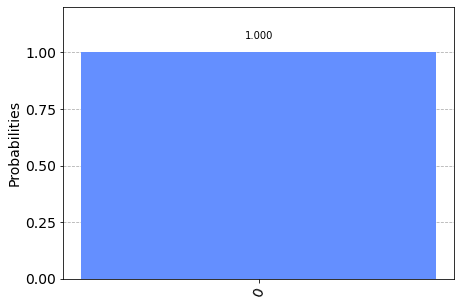

In [30]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(qc, backend=simulator)
result = execute(qc, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

## Tehtävän 4 kertausta: Bellin tilat ja niiden ket-vektoriesitys
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
### Johdanto
Tehtävässä 4 tarkastellaan vielä kertauksena yksinkertaista kvanttipiiriä, jota käytetään Bellin parin luomiseen. Bellin pari kubaa kahden kubitin välistä lomittumista eli kytkentää. Samalla tavoitteena on myös tutustua syvemmin ket-notaation käyttöön kvanttitilan kuvauksessa.

![bell_state](images/bell_state.png)

Kuvan piirissä molemmat kubitit ovat alussa tilassa $\ket 0$. Tämän jälkeen 1. kubittiin operoidaan H-portilla, ja kubitit 1 ja 2 lomitetaan CNOT-portilla. 1. kubitti on tällöin ohjaava kubitti, ja 2. kobitti on kohde. 

Kuvataan ensin kahden kubitin kvanttipiirin tila $H$-portin jälkeen. 1. kubitti on tilojen superpositiossa ja 2. kubitti on edelleen tilassa $\ket 0$:

$$
\frac{1}{\sqrt 2} (\ket 0 +  \ket 1) \otimes \ket 0
$$

Laskemalla tilojen tensoritulon saadaan kahden kubitin systeemin tila esitettyä muodossa


$$
\frac{1}{\sqrt 2} (\ket 0 \ket 0 +  \ket 1 \ket 0) = \frac{1}{\sqrt 2}(\ket{00}+\ket{10}).
$$

Seuraavaksi esitetään, miten CNOT-portti vaikuttaa kahden kubitin systeemissä. Jos ohjaavan ensimmäisen kubitin tila on 1, niin kohdekubitin eli jälkimmäisen kubitin tila kääntyy:

$$
\frac{1}{\sqrt 2}(\ket{00}+\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}+\ket{11})
$$

Tätä lopputilaa kutsutaan Bellin $\ket {\phi^+}$ tilaksi. Eli Bellin $\ket {\phi^+}$ tila määritellään seuraavasti:

$$\ket {\phi^+}=\frac{1}{\sqrt 2}(\ket{00}+\ket{11}$$

### Tehtävät ket-vektorien avulla:
A) Tutki saman H ja CNOT-porttien avulla toteutetun kvanttipiirin toiminta ket-notaation avulla alla olevan kuvan tilanteessa, jossa 1. kubitin alkutila on $\ket 1$ ja 2. kubitin alkutila on $\ket 0$. 

![bell_state](images/bell_state2.png)

Ohje: Muista 2. kierroksen tehtävien tulos, kuinka Hadamard-porttilla operointi vaikuttaa tilaan $\ket 1$, eli $H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1)$.


B) Laske piirin toiminta myös kubittien alkuarvoilla $\ket 0$ ja $\ket 1$ sekä $\ket 1$ ja $\ket 1$.


C) Alla olevassa koodiesimerkissä luodaan tehtävän kvanttipiiri kubittien alkuarvoilla $\ket 0$ ja $\ket 0$ sekä tulostetaan piirin tila H ja CNOT -porttien jälkeen. Pythonissa piirin lopputilaa voidaan tutkia käyttämällä `'statevector_simulator'`-ajuria ja komentoa `result.get_statevector(circuit)`. Piiriin ei siis suoriteta mittausta, eli kahden kubitin systeemi ei romahda mihinkään tiettyyn lopputilaan ja voimme tarkastella superposition tarkkoja arvoja. 

Tutki `get_statevector(ciruit)`-metodin tulostetta eri alkuarvoilla 10, 01, ja 11. Kubitin tilan saa käännettyä NOT eli X-portilla, esimerkiksi `circuit.x(qr[0])`. Muista, että globaali vaihe ei vaikuta mitenkään kvanttitilan ominaisuuksiin, eli simulaattori saattaa antaa tuloksen esimerkiksi niin, että kaikkien kertoimien etumerkki on oletettuun nähden käänteinen.

**LISÄTIETOJA: TEHTÄVÄN 4 RATKAISUT:**


Tehtävän A- ja B-kohdan ratkaisut ovat ns. Bellin tiloja, jotka määritellään seuraavasti:


**A:** Kun alkuarvot ovat $\ket 1$ ja $\ket 0$, niin saadaan $\ket {\phi^-}=\frac{1}{\sqrt 2}(\ket{00}-\ket{11}$

**B:**

Kun alkuarvot ovat $\ket 0$ ja $\ket 1$, niin saadaan $\ket {\psi^+}=\frac{1}{\sqrt 2}(\ket{01}+\ket{10}$ 

Kun alkuarvot ovat $\ket 1$ ja $\ket 1$, niin saadaan $\ket {\psi^-}=\frac{1}{\sqrt 2}(\ket{01}-\ket{10}$


Vektorit $\ket {\phi^+}$ ja $\ket {\phi^-}$ sekä $\ket {\psi^+}$ ja $\ket {\psi^-}$ ovat ns. ortonormaaleja Bellin kantavektoreita, joita voidaan käyttää kvanttipiirin tilan kuvauksessa. Kun Bellin kantavektorit laskettiin kahden kubitin alkutiloista suoritetiin ns. kannanvaihto. H- ja CNOT-porttien avulla toteutettu kannanvaihto on unitaarinen, koska käytetyt portit ovat unitaarisia. Oikeastaan kaikki ortonormaalien kantojen väliset kannanvaihto-operaattorit ovat unitaarisia.

Muista ket-vektori-esityksen ja pystyvektoriesityksen välinen algebraalinen määritelmä:
$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$

Ket-esityksestä on laskettuja esimerkkejä myös
<a href="https://drive.google.com/file/d/1A5xidy-xW8RGwCBWUCI45x4nAXU3vhdT/view?usp=sharing" target="_blank">
tässä tiedostossa.</a>

a-kohta:
$H\ket 1 \otimes \ket 0 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1) \otimes \ket 0$.


$$
\frac{1}{\sqrt 2}(\ket{00}-\ket{10}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{00}-\ket{11})
$$


b-kohta

$H\ket 0 \otimes \ket 1 = \frac{1}{\sqrt 2} (\ket 0 + \ket 1) \otimes \ket 1$.


$$
\frac{1}{\sqrt 2}(\ket{01}+\ket{11}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{01}+\ket{10})
$$

ja

$H\ket 1 \otimes \ket 1 = \frac{1}{\sqrt 2} (\ket 0 - \ket 1) \otimes \ket 1$.


$$
\frac{1}{\sqrt 2}(\ket{01}-\ket{11}) \xrightarrow{\text{CNOT}}\frac{1}{\sqrt 2}(\ket{01}-\ket{10})
$$

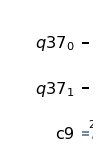

In [35]:
from qiskit import *

quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

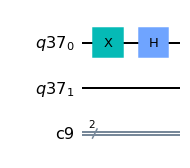

In [36]:
# Lisätään Hadamard-portti H 
circuit.x(0)
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

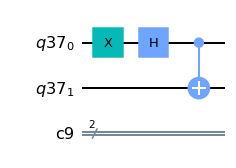

In [37]:
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')

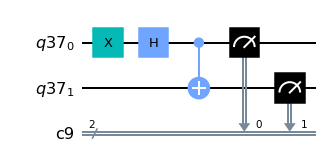

In [38]:
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

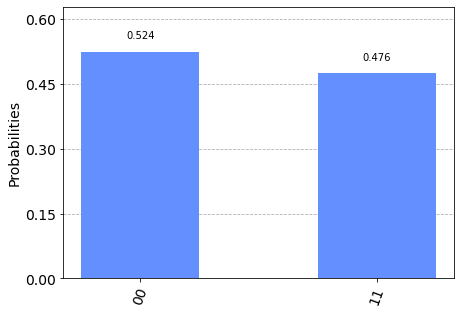

In [39]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

## Johdantoesimerkki 5
Tutustu qiskitin tutoriaalin kohtaan 1, jossa käsitellään monen kubitin systeemejä. Lataa Jupyter-notebook linkistä. Tiedosto löytyy valmiina koodikoulu.net-palvelusta.

<a href ="https://qiskit.org/textbook/content/ch-gates/multiple-qubits-entangled-states.ipynb">Qiskitin tutoriaali</a>

## Tehtävä 5

a) Ohjelmoi seuraava kolmen kubitin kvanttipiiri, jossa on kolme lomittunutta kubittia ja kolme klassista rekisteriä.
![three_qubits](images/three_qubits.png)

b) Mikä on kolmen kubitin systeemin tilavektori ket-esityksessä?

c) Mittaa kubittien tilat. Simuloi piirin toiminta, mitkä ovat mahdolliset lopputulokset ja miksi? 

d) Voit lähettää piirin oikealle kvanttitietokoneelle suoritettavaksi.

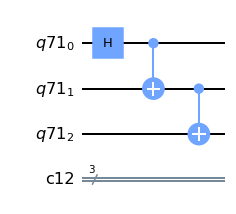

In [50]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit2 = QuantumCircuit(q, c)
circuit2.h(q[0])
circuit2.cx(q[0], q[1])
circuit2.cx(q[1], q[2])
circuit2.draw(output='mpl')

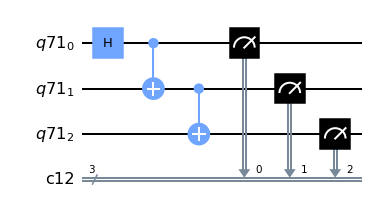

In [51]:
circuit2.measure(q, c)
circuit2.draw(output='mpl')

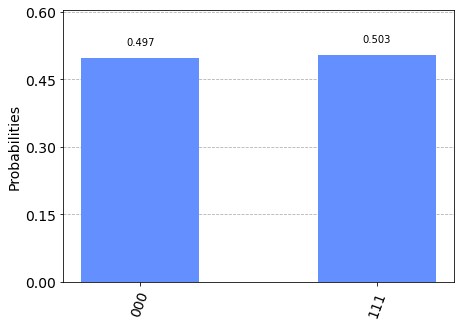

In [52]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit2, backend=simulator)
result = execute(circuit2, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit2))


Tilavektori:

$$
\frac{1}{\sqrt{2}} (\vert 000\rangle + \vert 111 \rangle)
$$

In [53]:
from qiskit import IBMQ
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_16_melbourne')
job=execute(circuit2, backend=qcomp)

ibmqfactory.load_account:WARNING:2021-03-10 17:22:48,959: Credentials are already in use. The existing account in the session will be replaced.


In [54]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)
result=job.result()

Job Status: job has successfully run


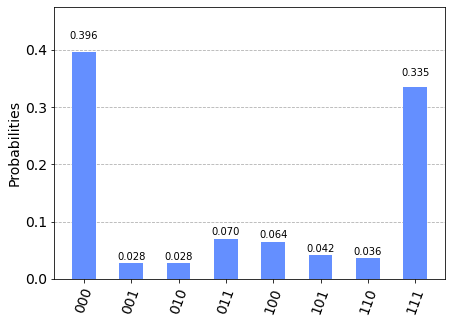

In [56]:
plot_histogram(result.get_counts(circuit2))

Oikea kvanttikone tekee myös virheitä, koska odotimme tulokseksi vain tiloja 000 ja 111